### 결정트리 알고리즘 기반 모델
- 데이터셋의 피쳐(특성)를 기준으로 데이터를 분류하는 알고리즘
- 질문방식으로 Yes/No 결과에 따라 데이터셋 분리
- 장점 : 스케일링이나 정규화 불필요 ==> 성능의 영향이 없음, 쉬운 알고리즘
- 단점 : 과대적합 ==> 해결을 위한 많은 하이퍼파라미터 존재!!
- 다른 ML 알고리즘에 비해 성능이 좋지 않음 ==>단, 여러개의 DT가 모이면 성능 강해짐
    * 앙상블에 주로 사용됨!

[1] 모듈로딩 및 데이터 준비

In [1]:
# 모듈로딩
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [2]:
# 데이터 로딩
featureDF, targetSR = load_iris(as_frame=True, return_X_y=True)

print(f"featureDF : {featureDF.shape}, {featureDF.ndim}D")
print(f"targetSR : {targetSR.shape}, {targetSR.ndim}D")

featureDF : (150, 4), 2D
targetSR : (150,), 1D


[2] 학습용 데이터셋 준비

In [3]:
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR,
                                                    stratify=targetSR,
                                                    random_state=10)

In [4]:
print(f"X_train : {X_train.shape}, {X_train.ndim}D")
print(f"X_test : {X_test.shape}, {X_test.ndim}D")

print(f"y_train : {y_train.shape}, {y_train.ndim}D")
print(f"y_test : {y_test.shape}, {y_test.ndim}D")

X_train : (112, 4), 2D
X_test : (38, 4), 2D
y_train : (112,), 1D
y_test : (38,), 1D


[3] 학습 - 기본 학습

In [5]:
# 모델 인스턴스 생성
dt_model = DecisionTreeClassifier(random_state=10)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [6]:
# 모델 파라미터 : fit() 후에 학습용 데이터셋을 기반으로 설정된 값들
print(f"[dt_model.classes_] {dt_model.classes_}")
print(f"[dt_model.n_classes_] {dt_model.n_classes_}개")
print(f"[dt_model.max_features_] {dt_model.max_features_}개")
print(f"[dt_model.feature_names_in_] {dt_model.feature_names_in_}개")
print(f"[dt_feature_importances_] {dt_model.feature_importances_}")

[dt_model.classes_] [0 1 2]
[dt_model.n_classes_] 3개
[dt_model.max_features_] 4개
[dt_model.feature_names_in_] ['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'
 'petal width (cm)']개
[dt_feature_importances_] [0.03125249 0.         0.06844775 0.90029976]


- 성능 체크

In [7]:
# 학습용 데이터셋에 대한 성능
train_score = dt_model.score(X_train, y_train)

# 테스트용 데이터셋에 대한 성능
test_score = dt_model.score(X_test, y_test)

In [8]:
print(f"train_score : {train_score}, test_score: {test_score}")

train_score : 1.0, test_score: 1.0


[4] 교차검증 => 데이터셋 부족 해결 및 과대적합을 회피

In [9]:
# 교차검증 준비 ==> 모델 인스턴스, trainDS, cv=5 [기본]
dt_model2 = DecisionTreeClassifier(random_state=1)
result = cross_validate(dt_model2, X_train, y_train,
                        return_train_score=True,
                        return_estimator=True)

In [10]:
# dict => DataFrame
resultDF = pd.DataFrame(result)
resultDF

,fit_time,score_time,estimator,test_score,train_score
0,0.001600,0.000764,DecisionTreeClassifier(random_state=1),0.956522,1.0
1,0.000906,0.000521,DecisionTreeClassifier(random_state=1),0.956522,1.0
2,0.000868,0.000520,DecisionTreeClassifier(random_state=1),0.954545,1.0
3,0.000835,0.000549,DecisionTreeClassifier(random_state=1),0.863636,1.0
4,0.000837,0.000520,DecisionTreeClassifier(random_state=1),0.909091,1.0


[5] 성능 향상 위한 튜닝 ==> 하이퍼파라미터 설정
- 단점 : 과대적합
    * max_depth, min_samples_leaf, ... ==> 많음

In [11]:
# 하이퍼파라미터 dict 생성
params = {'max_depth' : [4, 3, 2, 1],
          'min_samples_leaf' : [5, 3, 2],
          }

In [12]:
dt_gscv = GridSearchCV(DecisionTreeClassifier(), param_grid=params, refit=True)
dt_gscv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 3, 2, 1],
                         'min_samples_leaf': [5, 3, 2]})

In [13]:
# 모델 파라미터
print(f"[dt_gscv.best_params_] {dt_gscv.best_params_}")
print(f"[dt_gscv.best_score_] {dt_gscv.best_score_}")
print(f"[dt_gscv.best_estimator_] {dt_gscv.best_estimator_}")
print(f"[dt_gscv.cv_results_]\n {dt_gscv.cv_results_}")

[dt_gscv.best_params_] {'max_depth': 4, 'min_samples_leaf': 2}
[dt_gscv.best_score_] 0.9371541501976285
[dt_gscv.best_estimator_] DecisionTreeClassifier(max_depth=4, min_samples_leaf=2)
[dt_gscv.cv_results_]
 {'mean_fit_time': array([0.00096636, 0.00125389, 0.00066051, 0.00063262, 0.00070796,
       0.00078025, 0.00064554, 0.00106697, 0.00076094, 0.00073633,
       0.00144629, 0.00072603]), 'std_fit_time': array([2.43996293e-04, 5.41750357e-04, 3.29199340e-05, 2.24334527e-05,
       4.52454395e-05, 7.54319008e-05, 1.00844013e-05, 5.89543274e-04,
       9.89059123e-05, 8.92394850e-05, 5.66297266e-04, 8.71763964e-05]), 'mean_score_time': array([0.00059195, 0.00093422, 0.00049887, 0.00049524, 0.00070405,
       0.00060039, 0.00050502, 0.00080781, 0.0005455 , 0.00052986,
       0.00107465, 0.00053706]), 'std_score_time': array([5.30782946e-05, 4.13006101e-04, 1.69579813e-05, 1.29304663e-05,
       2.93175718e-04, 1.00394935e-04, 1.45840471e-05, 4.51514267e-04,
       3.06543623e-05, 1.1191

In [14]:
cv_resultDF = pd.DataFrame(dt_gscv.cv_results_)
cv_resultDF

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000966,0.000244,0.000592,0.000053,4,5,"{'max_depth': 4, 'min_samples_leaf': 5}",0.913043,0.956522,0.954545,0.863636,0.954545,0.928458,0.036299,2
1,0.001254,0.000542,0.000934,0.000413,4,3,"{'max_depth': 4, 'min_samples_leaf': 3}",0.913043,0.956522,0.954545,0.863636,0.909091,0.919368,0.034262,7
2,0.000661,0.000033,0.000499,0.000017,4,2,"{'max_depth': 4, 'min_samples_leaf': 2}",0.956522,0.956522,0.954545,0.909091,0.909091,0.937154,0.022925,1
3,0.000633,0.000022,0.000495,0.000013,3,5,"{'max_depth': 3, 'min_samples_leaf': 5}",0.913043,0.956522,0.954545,0.863636,0.954545,0.928458,0.036299,2
4,0.000708,0.000045,0.000704,0.000293,3,3,"{'max_depth': 3, 'min_samples_leaf': 3}",0.913043,0.956522,0.954545,0.863636,0.909091,0.919368,0.034262,7
5,0.000780,0.000075,0.000600,0.000100,3,2,"{'max_depth': 3, 'min_samples_leaf': 2}",0.913043,0.956522,0.954545,0.863636,0.909091,0.919368,0.034262,7
6,0.000646,0.000010,0.000505,0.000015,2,5,"{'max_depth': 2, 'min_samples_leaf': 5}",0.913043,0.956522,0.954545,0.909091,0.909091,0.928458,0.022163,2
7,0.001067,0.000590,0.000808,0.000452,2,3,"{'max_depth': 2, 'min_samples_leaf': 3}",0.913043,0.956522,0.954545,0.909091,0.909091,0.928458,0.022163,2
8,0.000761,0.000099,0.000546,0.000031,2,2,"{'max_depth': 2, 'min_samples_leaf': 2}",0.913043,0.956522,0.954545,0.909091,0.909091,0.928458,0.022163,2
9,0.000736,0.000089,0.000530,0.000011,1,5,"{'max_depth': 1, 'min_samples_leaf': 5}",0.652174,0.652174,0.681818,0.636364,0.636364,0.651779,0.016601,10


- 주요 피쳐 시각화

In [15]:
# 가장 좋은 모델
best_model = dt_gscv.best_estimator_
print(f"[best_model.max_depth] {best_model.max_depth}")
print(f"[best_model.min_samples_leaf] {best_model.min_samples_leaf}")

[best_model.max_depth] 4
[best_model.min_samples_leaf] 2


In [16]:
# 피쳐 중요도 및 개수
best_model.feature_importances_, best_model.n_features_in_, best_model.feature_names_in_

(array([0.01321873, 0.        , 0.07164651, 0.91513476]),
 4,
 array(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
        'petal width (cm)'], dtype=object))

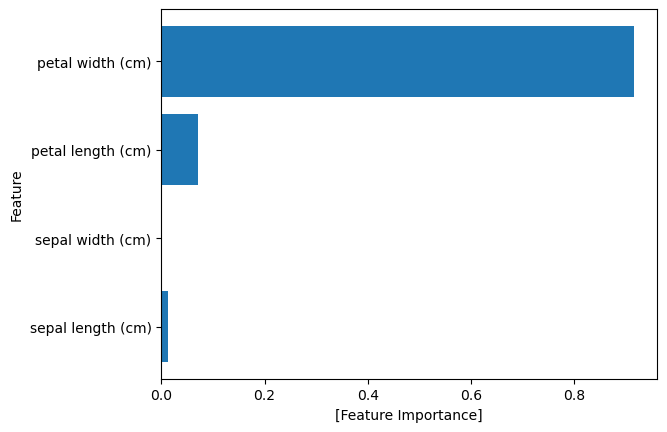

In [17]:
import matplotlib.pyplot as plt

plt.barh(range(best_model.n_features_in_), best_model.feature_importances_, align='center')
plt.yticks(np.arange(best_model.n_features_in_), best_model.feature_names_in_)
plt.xlabel("[Feature Importance]")
plt.ylabel("Feature")
plt.show()

- DT 그래프 시각화
    * Graphviz 프로그램 설치 + python용 패키지 graphviz 설치

In [18]:
best_model.feature_names_in_

array(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'], dtype=object)

In [19]:
best_model.classes_, targetSR.unique()

(array([0, 1, 2]), array([0, 1, 2]))

In [20]:
load_iris()['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [30]:
# (1) DT모델을 dot포맷의 파일로 저장 ==> export_graphviz()
from sklearn.tree import export_graphviz

export_graphviz(best_model, out_file='tree.dot',
                class_names=load_iris()['target_names'],
                feature_names=best_model.feature_names_in_,
                impurity=True, filled=True, rounded=True)

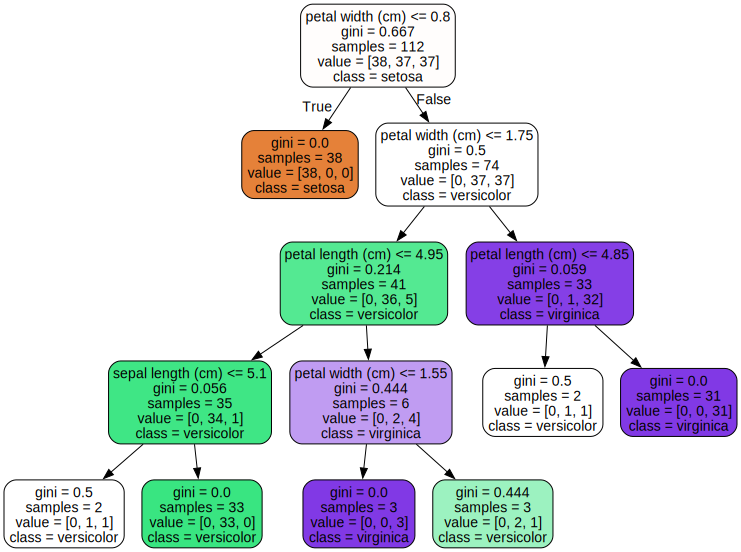

In [31]:
# (2) dot파일 출력
import graphviz

# 파일에서 데이터 읽어오기
with open('tree.dot') as f:
    dot_data = f.read()

# 화면에 출력하기
graphviz.Source(dot_data)

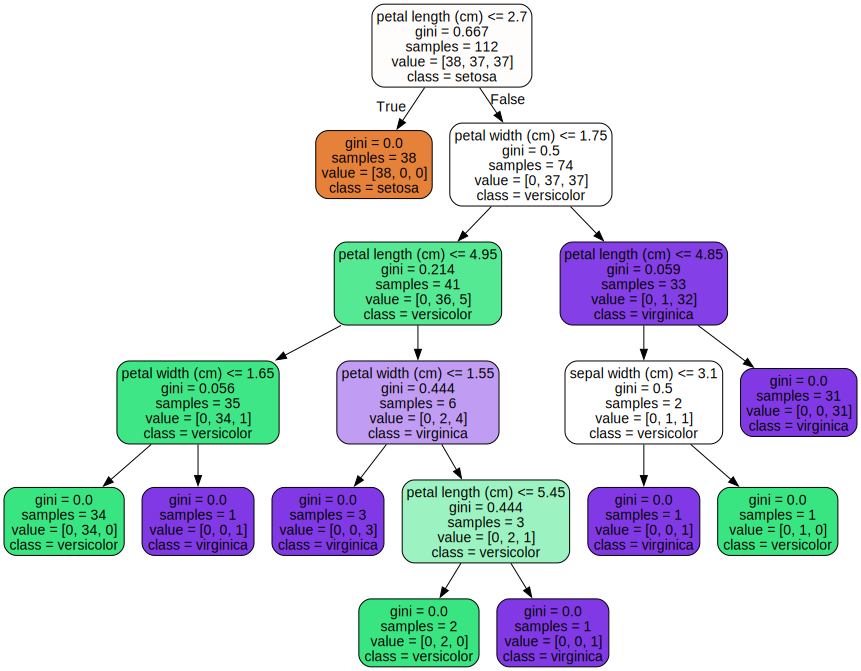

In [34]:
dt1 = DecisionTreeClassifier()
dt1.fit(X_train, y_train)
export_graphviz(dt1, out_file='tree.dot',
                class_names=load_iris()['target_names'],
                feature_names=best_model.feature_names_in_,
                impurity=True, filled=True, rounded=True)

# 파일에서 데이터 읽어오기
with open('tree.dot') as f:
    dot_data = f.read()

# 화면에 출력하기
graphviz.Source(dot_data)

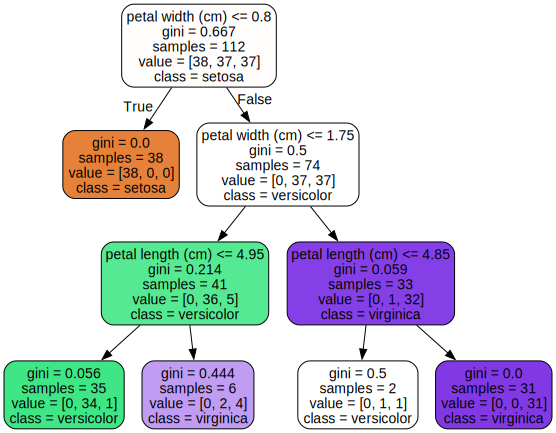

In [36]:
dt2 = DecisionTreeClassifier(max_depth=3)
dt2.fit(X_train, y_train)
export_graphviz(dt2, out_file='tree.dot',
                class_names=load_iris()['target_names'],
                feature_names=best_model.feature_names_in_,
                impurity=True, filled=True, rounded=True)

# 파일에서 데이터 읽어오기
with open('tree.dot') as f:
    dot_data = f.read()

# 화면에 출력하기
graphviz.Source(dot_data)

[6] 새로운 데이터 예측

In [45]:
new_data = featureDF.iloc[[0],:]+0.21
new_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.31,3.71,1.61,0.41


In [46]:
best_model.predict(new_data)

array([0])

In [47]:
best_model.predict_proba(new_data)

array([[1., 0., 0.]])